In [1]:
import cv2
import numpy as np

import sys
sys.path.append('/cephfs/SZ-AI/usr/liuchenyu/HaiLook/Moore-AnimateAnyone')
sys.path.append('/cephfs/SZ-AI/usr/liuchenyu/HaiLook/Moore-AnimateAnyone/tools')

from src.utils.util import get_fps, read_frames, save_videos_from_pil

from src.dwpose import DWposeDetector, draw_pose
from controlnet_aux.util import HWC3, resize_image
from PIL import Image
import matplotlib.pyplot as plt
from openpose_rescaler import draw, rescale_skeleton, crop_and_resize
from src.dataset.dance_video_aug import HumanDanceVideoAugDataset
import openpose_rescaler
import importlib
from tqdm import tqdm

/root/miniconda3/envs/animateAnyone/lib/python3.10/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/root/miniconda3/envs/animateAnyone/lib/python3.10/site-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/root/miniconda3/envs/animateAnyone/lib/python3.10/site-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being regist

In [2]:
# Load a dwpose detector
detector = DWposeDetector()
detector = detector.to('cuda')

2024-02-27 18:30:46.896136750 [W:onnxruntime:, session_state.cc:1162 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2024-02-27 18:30:46.896164390 [W:onnxruntime:, session_state.cc:1164 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


In [13]:
# Load Image
video_path = '/cephfs/SZ-AI/usr/liuchenyu/HaiLook/Moore-AnimateAnyone/assets/video_clips/vid_kiss.mp4'

index = 190

H = 512
W = 512

img = read_frames(video_path)[index]

ref_image = cv2.resize(np.array(img), (H,W))

ref_pose, score, ref_pose_keypoints = detector(ref_image, output_type='key_points', face=False)
score = np.mean(score, axis=-1)

(-0.5, 511.5, 511.5, -0.5)

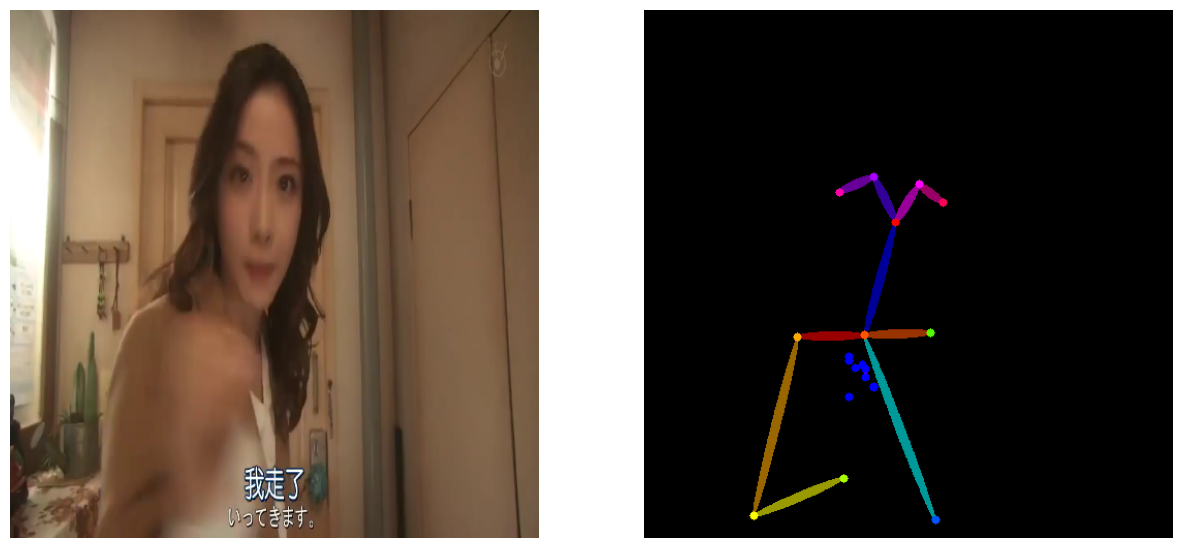

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
axs[0].imshow(ref_image)
axs[1].imshow(ref_pose)
axs[0].axis('off')
axs[1].axis('off')

In [15]:
save_name = f'kiss_goodbye_{index}'

ref_pose.save(f'/cephfs/SZ-AI/usr/liuchenyu/HaiLook/Moore-AnimateAnyone/assets/pose_img/{save_name}.png')